<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/math_differential_calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## [Video de apoyo a la lectura interactiva y experimental de este cuaderno sobre sumas de Riemann](https://www.youtube.com/watch?v=dTklSrqHpo4)

# [Sumas de Riemannn con sympy](https://docs.sympy.org/latest/modules/integrals/integrals.html)

# Áreas y distancias

Página 397 de Stewart. 

En esta sección se descubre que, al intentar calcular el área bajo una curva o la distancia 
recorrida por un automóvil, se llega al mismo tipo especial de límite.

## El problema del área

Intente resolver el problema del área: encuentre el área de la región $S$ que está debajo 
de la curva $y = f(x)$, de $a$ a $b$. 

Esto significa que $S$, la cual se muestra en la figura 1, está limitada por la gráfica de una función continua $f$ [donde $f(x) > 0$], las rectas verticales  $x = a$ y $x = b$, y el eje $x$. 

Al intentar resolver el problema del área, debe preguntarse: ¿cuál es el significado de la palabra área?

Esta cuestión es fácil de responder para regiones con lados rectos. 

Para un rectángulo, el área se de ne como el producto del largo y el ancho. El área de 
un triángulo es la mitad de la base multiplicada por la altura. El área de un polígono 
se encuentra al dividirlo en triángulos (como en la  gura 2) y sumar las áreas de esos 
triángulos.

# Mapa conceptiual de la clasificación de los cuadriláteros de ecuerdo a los criterios el número de pares de lados opuestos paralelos, el número de lados igules, y ell número de ángulos iguales

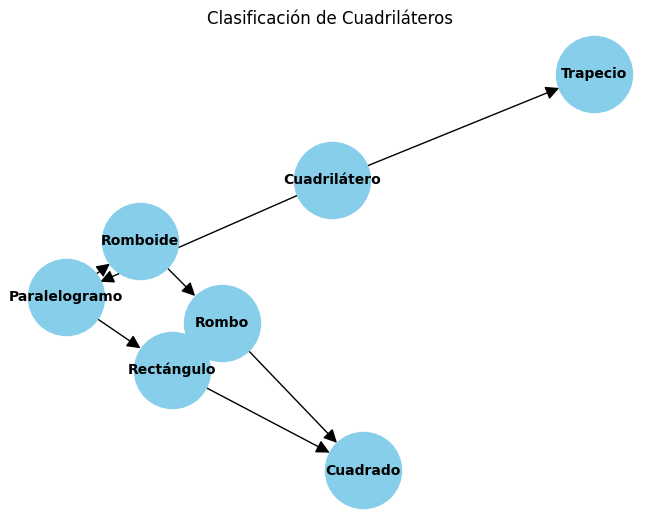

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo para el mapa conceptual
G = nx.DiGraph()

# Agregar nodos al grafo (clases de cuadriláteros)
G.add_node("Cuadrilátero")
G.add_node("Trapecio", parent="Cuadrilátero")
G.add_node("Paralelogramo", parent="Cuadrilátero")
G.add_node("Rectángulo", parent="Paralelogramo")
G.add_node("Romboide", parent="Paralelogramo")
G.add_node("Rombo", parent="Romboide")
G.add_node("Cuadrado", parent="Rectángulo")

# Agregar relaciones entre nodos
G.add_edge("Cuadrilátero", "Trapecio")
G.add_edge("Cuadrilátero", "Paralelogramo")
G.add_edge("Paralelogramo", "Rectángulo")
G.add_edge("Paralelogramo", "Romboide")
G.add_edge("Romboide", "Rombo")
G.add_edge("Rectángulo", "Cuadrado")
G.add_edge("Rombo", "Cuadrado")

# Dibujar el mapa conceptual
pos = nx.spring_layout(G, seed=42)  # Posiciones de los nodos
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
plt.title("Clasificación de Cuadriláteros")
plt.show()


# Ejemplo del Purcell Página 219. 

## Área por medio de polígonos inscritos 

Considere la región R acotada por la parábola $y = f(x) = x^{2}$, el eje $x$ y la recta vertical $x = 2$ (figura 5).   

Nos referiremos a $R$ como la región acotada bajo la curva $y = x^{2}$, entre $x = 0$ y $x = 2$. Nuestra meta es calcular su área $A(R)$.

In [2]:
import numpy as np 

import matplotlib.pyplot as plt 

from ipywidgets import interact
delta = 1
dominio = np.arange(0,2+delta, delta)

dominio



array([0, 1, 2])

## EJEMPLO 1 

página 397 del PDF de Cálculo de Stewart. 

Utilice rectángulos para estimar el área bajo la parábola $y = x^{2}$ , de $0$ a $1$ 
(la región parabólica S se ilustra en la figura 3).

In [22]:
# Mapa conceptual 
from graphviz import Digraph

# Crear un nuevo grafo dirigido
dot = Digraph()

# Añadir nodos y relaciones al grafo
main_concept = 'Integral'
dot.node('A', main_concept)
dot.node('B', 'Integral indefinida')
dot.node('C', 'Integral definida')
dot.node('D', 'Antiderivada')
dot.node('E', 'Área')


dot.edges(['AB', 'AC'])
dot.edges(['BD', 'CE'])


# Guardar el grafo como un archivo de imagen
dot.render(filename=main_concept, format='png', cleanup=True, \
           directory='/home/marco/Documentos/docencia/calculo/images/4_integral/2_aplicaciones_integral_definida/2_area')

dot.view()



'/home/marco/Documentos/docencia/calculo/images/4_integral/2_aplicaciones_integral_definida/2_area/Integral.pdf'

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/marco/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(process:31574): Gtk-WARNING **: 20:53:00.514: Locale not supported by C library.
	Using the fallback 'C' locale.
/home/marco/snap/code/common/.cache/gio-modules/libgiolibproxy.so: cannot open shared object file: Permission denied
Failed to load module: /home/marco/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(evince:31574): Gtk-WARNING **: 20:53:00.573: Theme parsing error: gtk-keys.css:1:0: Failed to import: Error opening file /snap/code/157/usr/share/themes/Default/gtk-3.0/gtk-keys.css: Permission denied
Gtk-Message: 20:53:00.574: Failed to load module "canberra-gtk-module"
Gtk-Message: 20:53:00.575: Failed to load module "canberra-gtk-module"


# Ejemplo de determinación de área exacta de una región no necesariamente poligonal. 

## [Video de apoyo](https://www.youtube.com/watch?v=pr-mtqoN5og)

Hallar el área exacta de la región acotada por la curva de la función y el eje $x$ en el intervalo que se indica.  


$$ f(x) = 4x - 1, \quad \quad [2,4] $$

Empecemos identificando a la función dada para facilitar el proceso de graficación:   

$$ y = mx + b $$

In [16]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

m = 4 
b = -1 

def f(x):
    return 4*x - 1

dominio = np.arange(2, 4 + 1, 1)
rango = f(dominio)
tabla = pd.DataFrame({'x':dominio, 'f(x)': rango})
tabla 

,x,f(x)
0,2,7
1,3,11
2,4,15


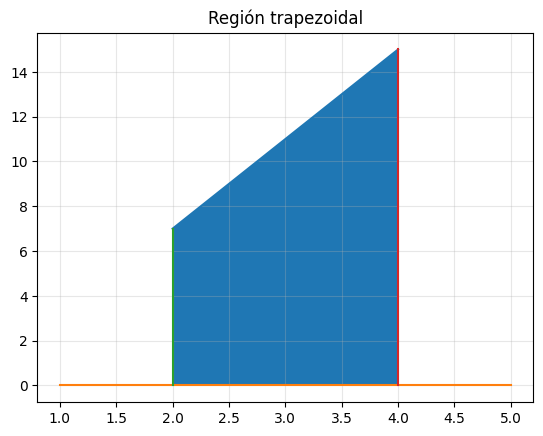

In [25]:
plt.title('Región trapezoidal')
plt.plot(dominio, rango) # gráfico de la función
plt.fill_between(dominio, rango)
plt.plot([1, 5], [0, 0]) # trazo de eje horizontal 
plt.grid(alpha = 0.3) 
plt.plot([2,2], [0, f(2)])
plt.plot([4,4], [0, f(4)])

plt.savefig('/home/marco/Documentos/docencia/calculo/images/4_integral/2_aplicaciones_integral_definida/2_area/trapecio.jpg')

In [11]:
b1 = f(2)
b2 = f(4)
area_trapecio = ((b1+b2)/2)*2
area_trapecio

22.0

In [13]:
from sympy import * 
x, n = var('x, n')
funcion = 4*x - 1

integrate(funcion, (x, 2, 4))

22

# Determinemos el área utilizando el concepto de suma de Riemann  

## Metodología  

1. Divide el intervalo $[2,4]$ en $n$ partes iguales
2. Determine la fórmula de los extremos derechos de esta partición regular. 
3. Determine las alturas de los rectángulos. 
4. Determine el área del i-ésimo rectángulo. 
5. Determinar la suma de Riemann
6. Simplificar la suma de Riemann. 
7. Calcular el límite cuando $n$ tiende a infinito de la suma de Riemann. 

In [14]:
deltax = (4-2)/n
deltax 

2/n

Deduzca de manera inductiva la fórmula para el $i$- ésimo extremo.   

$x_{0} = 2$    
$x_{1} = 2 + 1\Delta x$  
$x_{2} = 2 + 2\Delta x$  
$\vdots$  
$x_{i} = 2 + i\Delta x = 2 + i \cdot \frac{2}{n} = 2 + \frac{2}{n} \cdot i $

$$ \text{alturas} = f(x_{i})  = 4x_{i} - 1 =  4 \left( 2 + \frac{2}{n} \cdot i  \right) - 1 $$

$$ \text{alturas} = 8\left( 1 + \frac{i}{n} \right) - 1 $$

$$ \text{alturas} = 8\left(\frac{ n + i }{n} \right) - 1 $$

$$ \text{alturas} = \frac{8(n+i) - n }{n} $$

$$ \text{alturas} = \frac{7n + 8i}{n} $$

$$ \text{área del i- ésimo rectángulo es} = (\text{altura i-ésima})(\text{base i-ésima}) $$

$$  = \frac{7n + 8i}{n} \cdot \frac{2}{n} $$

$$ \text{área i-ésima} = \frac{2(7n + 8i)}{n^{2}} $$

$$ \text{suma de Riemann} = \sum_{i = 1}^{n} \frac{2(7n + 8i)}{n^{2}} $$

Lo que sigue es expresar la suma de Riemann sin utilizar el operador sumatoria: 



$$ \text{suma de Riemann} = \sum_{i = 1}^{n} \left( \frac{14n}{n^{2}} + \frac{16}{n^{2}} \cdot i \right) $$

$$ \text{suma de Riemann} =  \left( \sum_{i = 1}^{n}\frac{14n}{n^{2}} + \sum_{i = 1}^{n}\frac{16}{n^{2}} \cdot i \right) $$

$$ \text{suma de Riemann} =  \left( \frac{14n}{n^{2}}\sum_{i = 1}^{n}1 + \frac{16}{n^{2}} \cdot\sum_{i = 1}^{n} i \right) $$

$$ \text{suma de Riemann} =  \left( \frac{14n}{n^{2}} \cdot n + \frac{16}{n^{2}} \cdot \frac{n(n+1)}{2} \right) $$

$$ \text{suma de Riemann} =  \left( 14 + \frac{16}{n^{2}} \cdot \frac{n(n+1)}{2} \right) $$

$$ \text{suma de Riemann} =  \left( 14 + \frac{16n^{2} + 16n}{2n^{2}} \right) $$

$$ \text{Suma de Riemann} = 14 + 8 + \frac{16n}{2n^{2}} $$

$$ \text{Suma de Riemann} = 14 + 8 + \frac{8}{n} $$

$$ \text{Suma de Riemann} = 22 + \frac{8}{n} $$

$$ \lim \text{Suma Riemann} = \int_{2}^{4} 4x - 1  = \text{área exacta} $$

$$ 22 = \int_{2}^{4} (4x - 1) \ dx  = \text{área exacta} $$

# Determine el área de una región limitada por encima por una parábola. 


$$ f(x) = 4x - x^{2}, \quad [0,4] $$

# Taller sumas de Riemann

In [8]:
def f(x):
    return (2*x+4)**0.5

In [18]:
(f(-2)+f(-2+1/8) + f(-2+2*1/8) + f(-2+3*1/8)+ f(-2+4*1/8)+ f(-2+5*1/8)+ f(-2+6*1/8)+ f(-2+7*1/8))*1/8

0.8423483375805956

In [ ]:
(f(-2)+f(-2+1/8) + f(-2+2*1/8) + f(-2+3*1/8)+ f(-2+4*1/8)+ f(-2+5*1/8)+ f(-2+6*1/8)+ f(-2+7*1/8))*1/8

In [1]:
-2+1/8

-1.875

In [2]:
-2+2*1/8

-1.75

In [3]:
-2+3*1/8

-1.625

In [4]:
-2+4*1/8

-1.5

In [5]:
-2+5*1/8

-1.375

In [6]:
-2+6*1/8

-1.25

In [7]:
-2+7*1/8

-1.125

In [20]:
import numpy as np

np.arange(start = -2, stop = -1, step = 1/8 ) # el step es delta x

array([-2.   , -1.875, -1.75 , -1.625, -1.5  , -1.375, -1.25 , -1.125])

In [25]:
f(np.arange(start = -2, stop = -1, step = 1/8 ))

array([0.        , 0.5       , 0.70710678, 0.8660254 , 1.        ,
       1.11803399, 1.22474487, 1.32287566])

In [26]:
sum(f(np.arange(start = -2, stop = -1, step = 1/8 )))

6.738786700644765

In [24]:
sum(f(np.arange(start = -2, stop = -1, step = 1/8 )))*1/8

0.8423483375805956

## [Sumas de Riemann con Python](https://stackoverflow.com/questions/29318682/integration-with-riemann-sum-python)

In [5]:
def integral(a, b, d):
    if a > b:
        a,b = b,a
    delta_x = float((b-a)/1000)
    j = abs((b-a)/delta_x)
    i = int(j)
    n = s = 0
    x = a
    while n < i:
        delta_A = (x**2) * delta_x
        x += delta_x
        s += delta_A

        n += 1

    return abs(s)

print(integral(0,1,0.0001))

0.33283350000000095


In [41]:
n = 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [43]:
1/n*2

2e-88

## Referentes  

* Integrals of Sympy: https://docs.sympy.org/latest/modules/integrals/integrals.html

In [45]:
(18+24+32/3)*3

158.0

In [46]:
332/3

110.66666666666667

In [50]:
from sympy import *

x = var('x')

integrate(2*x**2-5*x, (x, (3, 7))) 

332/3